<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras import utils

import matplotlib.pyplot as plt



2023-11-04 11:06:10.012167: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-04 11:06:10.013560: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-04 11:06:10.039565: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 11:06:10.039599: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 11:06:10.039616: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
import matplotlib as mpl
mpl.style.use('classic')

## Model

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170498071/170498071 [==============================] - 120s 1us/step


In [4]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [5]:
nClasses = 10
y_train = utils.to_categorical(y_train,nClasses)
y_test = utils.to_categorical(y_test,nClasses)

In [6]:
x_train.shape[1:]

(32, 32, 3)

In [7]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [8]:
K.clear_session()
model = createModel()

In [9]:
AdamOpt = Adam(learning_rate=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [11]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


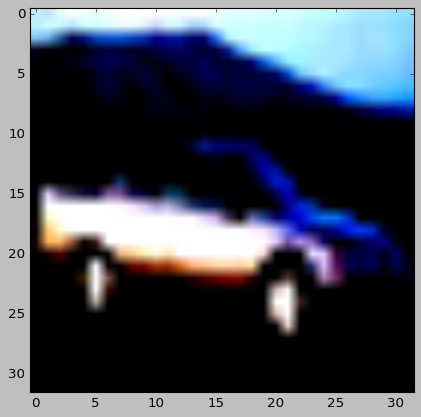

In [12]:
plt.imshow(x_train[4])

In [13]:
batch_size = 256
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 42s 211ms/step - loss: 1.7691 - accuracy: 0.3380 - val_loss: 1.4636 - val_accuracy: 0.4368
Epoch 2/10
196/196 [==============================] - 47s 238ms/step - loss: 1.3469 - accuracy: 0.5072 - val_loss: 1.1676 - val_accuracy: 0.5786
Epoch 3/10
196/196 [==============================] - 49s 248ms/step - loss: 1.1482 - accuracy: 0.5841 - val_loss: 1.0287 - val_accuracy: 0.6305
Epoch 4/10
196/196 [==============================] - 46s 233ms/step - loss: 1.0317 - accuracy: 0.6321 - val_loss: 0.9292 - val_accuracy: 0.6739
Epoch 5/10
196/196 [==============================] - 66s 335ms/step - loss: 0.9274 - accuracy: 0.6733 - val_loss: 0.8610 - val_accuracy: 0.6969
Epoch 6/10
196/196 [==============================] - 85s 432ms/step - loss: 0.8609 - accuracy: 0.6958 - val_loss: 0.8228 - val_accuracy: 0.7127
Epoch 7/10
196/196 [==============================] - 87s 447ms/step - loss: 0.8102 - accuracy: 0.7147 - val_loss: 0.7534 - val_ac

In [14]:
history.history

{'loss': [1.7691411972045898,
  1.3468815088272095,
  1.1482243537902832,
  1.031716227531433,
  0.9274485111236572,
  0.8609240055084229,
  0.8102491497993469,
  0.7657599449157715,
  0.7298680543899536,
  0.7087075710296631],
 'accuracy': [0.338019996881485,
  0.5072199702262878,
  0.5840799808502197,
  0.6320800185203552,
  0.6732800006866455,
  0.6958000063896179,
  0.714739978313446,
  0.7315000295639038,
  0.7456600069999695,
  0.7519599795341492],
 'val_loss': [1.4635809659957886,
  1.1676068305969238,
  1.0287013053894043,
  0.9291900396347046,
  0.8610301613807678,
  0.8228155970573425,
  0.7533503770828247,
  0.720554769039154,
  0.6887335181236267,
  0.7098587155342102],
 'val_accuracy': [0.4368000030517578,
  0.5785999894142151,
  0.6305000185966492,
  0.6739000082015991,
  0.6969000101089478,
  0.7127000093460083,
  0.7376999855041504,
  0.7486000061035156,
  0.7657999992370605,
  0.7527999877929688]}

Text(0, 0.5, 'Loss')

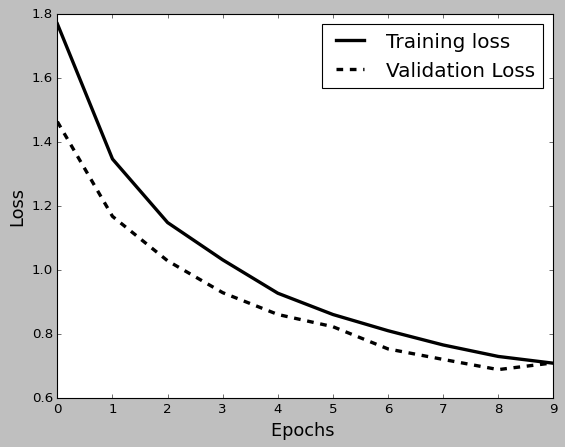

In [15]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

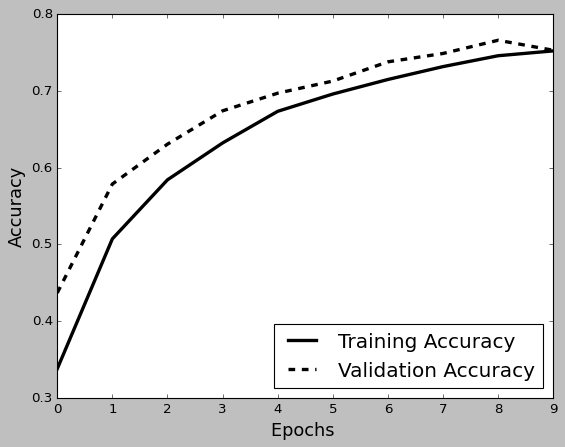

In [16]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
